In [61]:
import torch
from transformers import VisionEncoderDecoderModel, DonutProcessor
from PIL import Image

import os
from huggingface_hub import InferenceClient
from dotenv import load_dotenv
import cv2
import numpy as np


In [55]:
# OCR models
# OCR_MODEL = "microsoft/trocr-base-handwritten"
# OCR_MODEL = "microsoft/trocr-large-handwritten"
# OCR_MODEL = "microsoft/trocr-base-printed"
OCR_MODEL = "chinmays18/medical-prescription-ocr"

processor = DonutProcessor.from_pretrained(OCR_MODEL)
model = VisionEncoderDecoderModel.from_pretrained(OCR_MODEL)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

print(f"Model loaded on {device}")

Model loaded on cpu


In [57]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image


In [58]:
def extract_text_from_prescription(image_path):
    image = load_image(image_path)

    pixel_values = processor(image, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    task_prompt = "<s_prescription_ocr>"
    decoder_input_ids = processor.tokenizer(
        task_prompt, return_tensors="pt"
    ).input_ids.to(device)

    outputs = model.generate(
        pixel_values,
        decoder_input_ids=decoder_input_ids,
        max_length=512,
        early_stopping=True
    )

    result = processor.batch_decode(outputs, skip_special_tokens=True)[0]
    return result


In [59]:
image_path = "../data/img_prescription/PDS_(1).jpg"  # replace with your image

ocr_text = extract_text_from_prescription(image_path)

print("===== OCR OUTPUT =====")
print(ocr_text)


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


===== OCR OUTPUT =====
<s_prescription_ocr> . Farmstruct 12 Kirkville tel.3876 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


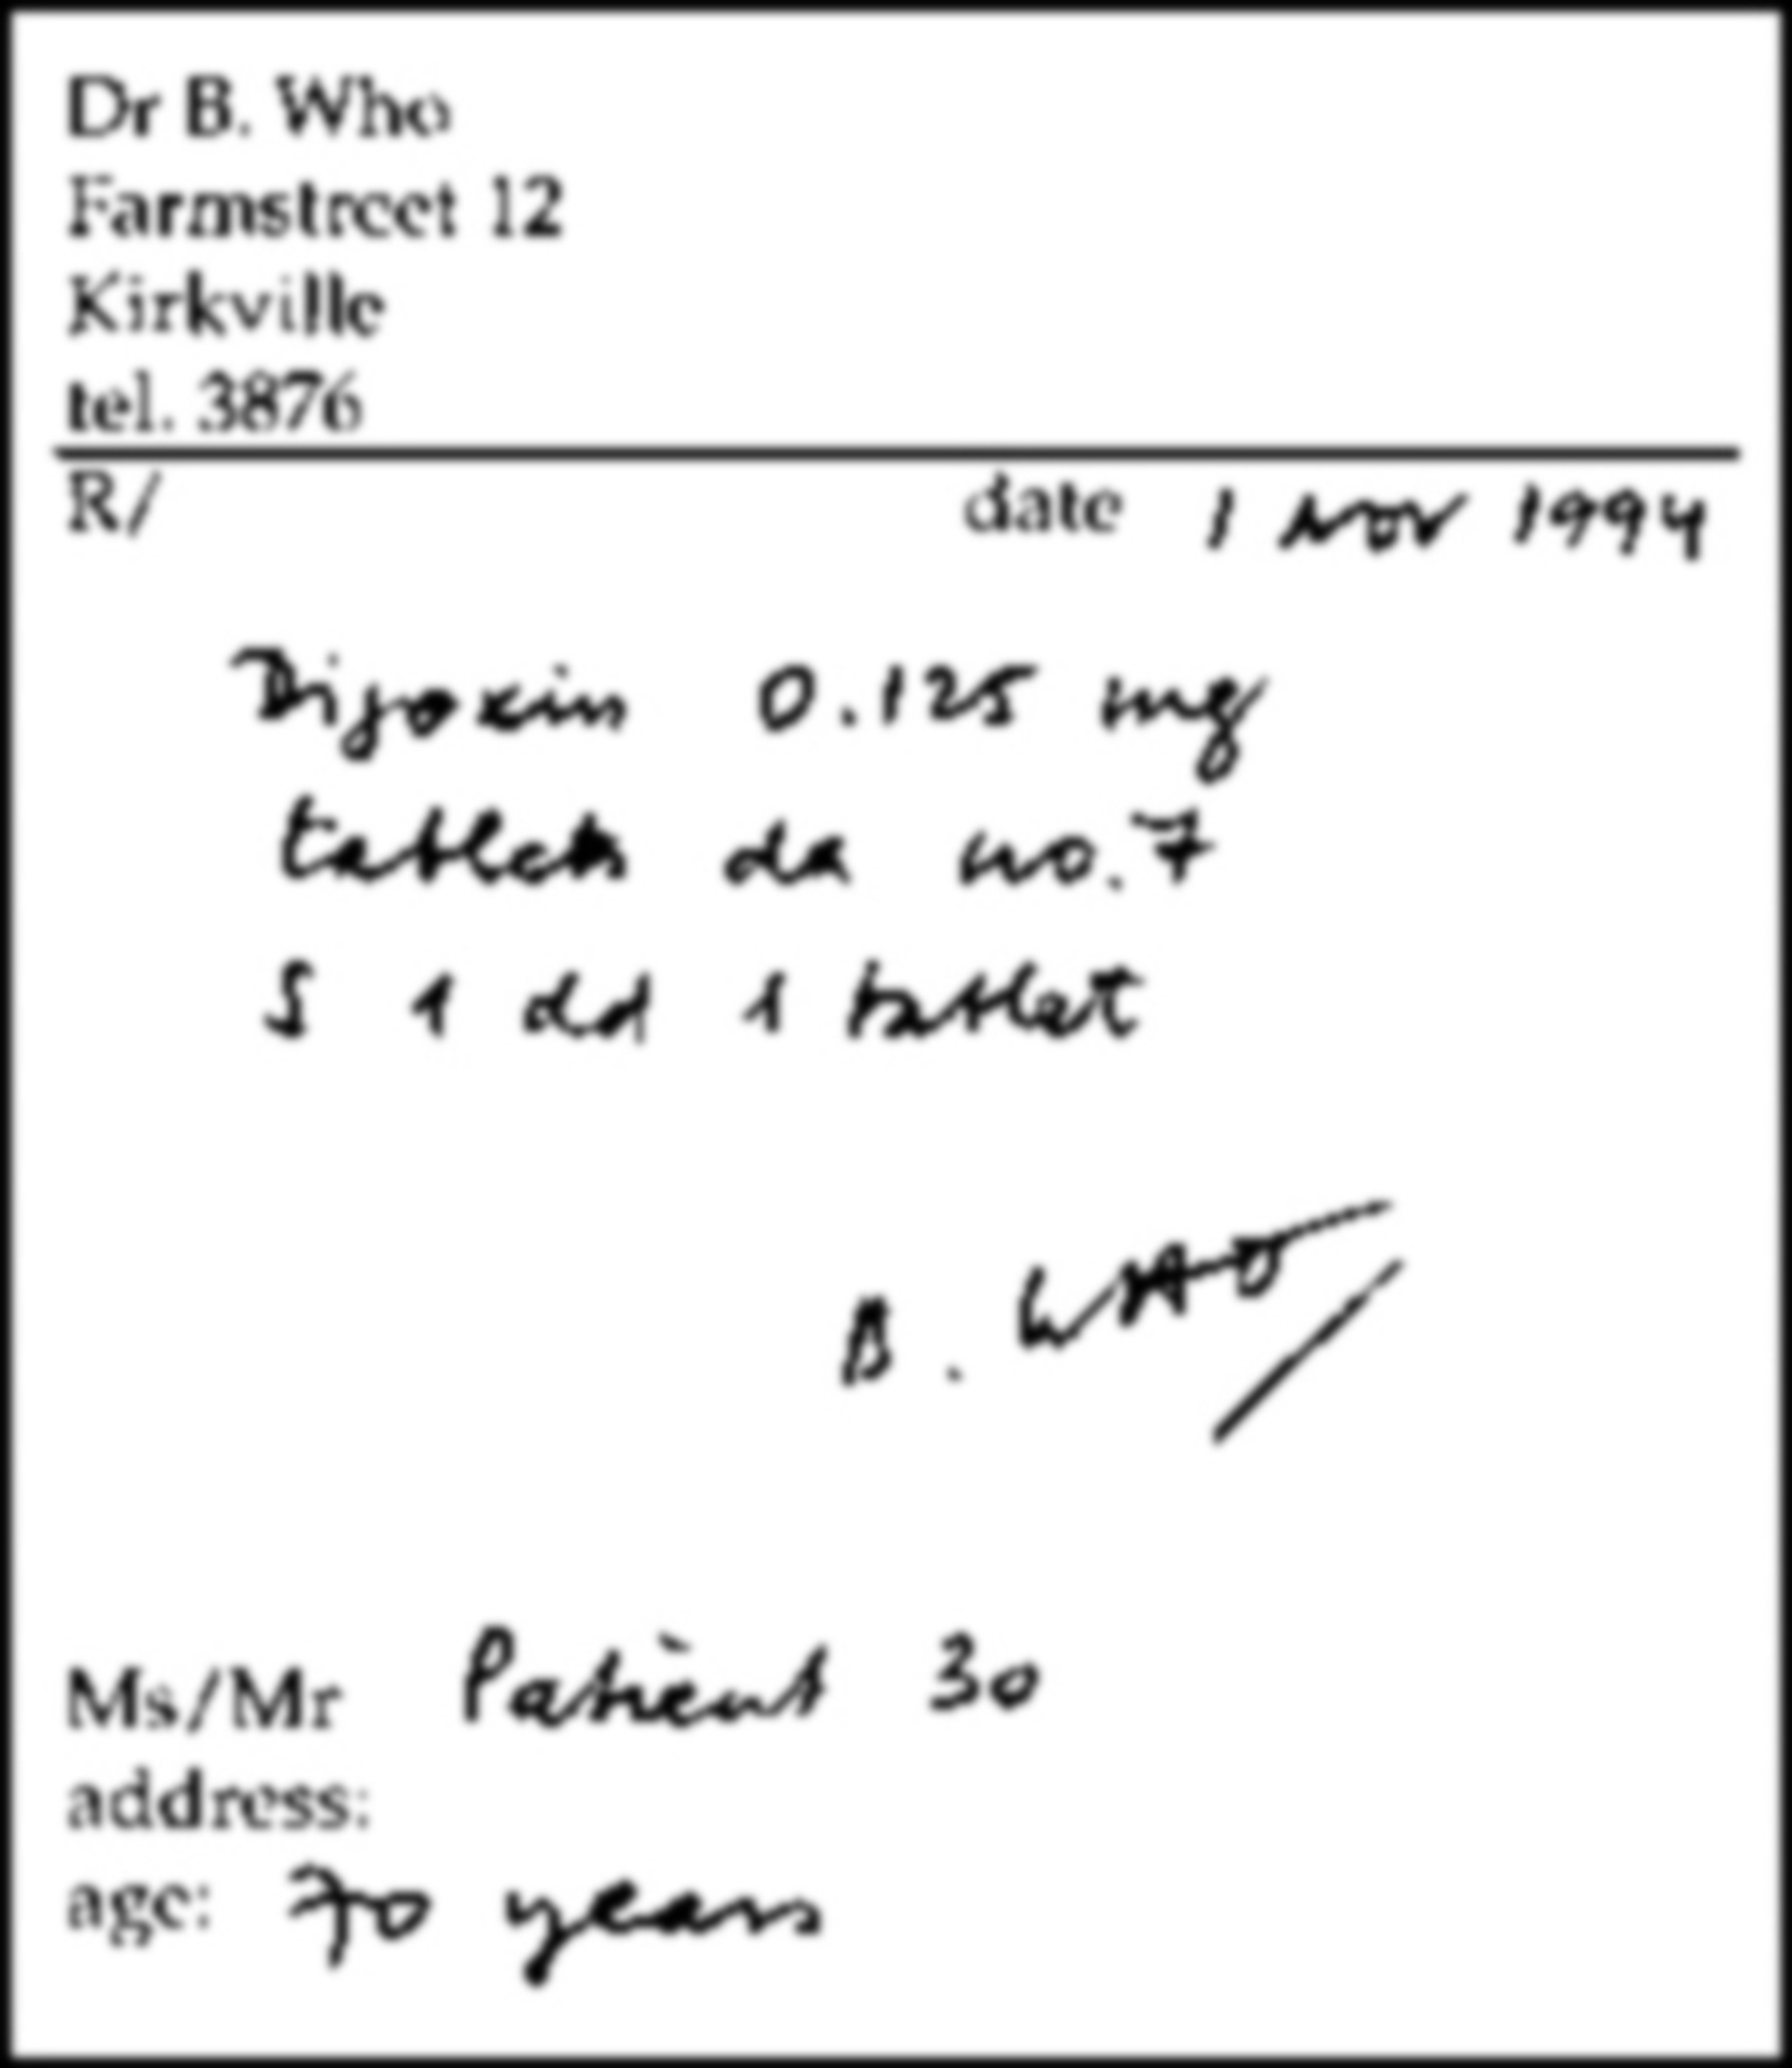

In [60]:
display(Image.open(image_path))
